In [42]:
import pandas as pd
import nibabel as nib

from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = "Malgun Gothic"  # Windows

In [43]:
data = pd.read_csv('patient_information.csv')

In [44]:
print(data.head())

   Unnamed: 0  PHASE        PTID     VISDATE  MMSCORE   성별     생년월일  \
0           0  ADNI3  022_S_6013  2017-04-12     23.0  2.0  11/1956   
1           1  ADNI3  022_S_6013  2018-05-23     20.0  2.0  11/1956   
2           2  ADNI3  022_S_6013  2019-05-23     19.0  2.0  11/1956   
3           3  ADNI3  141_S_1052  2017-03-29     26.0  2.0  11/1937   
4           4  ADNI3  141_S_1052  2018-07-09     28.0  2.0  11/1937   

   education         MRI Unnamed: 8  
0       12.0  2017-04-26     MRI 추가  
1       12.0  2018-05-23        NaN  
2       12.0  2019-06-21        NaN  
3        8.0  2017-04-19        NaN  
4        8.0  2018-07-28        NaN  


In [45]:
data = (data.drop(columns=['Unnamed: 8'])).dropna(axis=0)
data = (data.drop(columns=['Unnamed: 0']))
print(data.head())

   PHASE        PTID     VISDATE  MMSCORE   성별     생년월일  education         MRI
0  ADNI3  022_S_6013  2017-04-12     23.0  2.0  11/1956       12.0  2017-04-26
1  ADNI3  022_S_6013  2018-05-23     20.0  2.0  11/1956       12.0  2018-05-23
2  ADNI3  022_S_6013  2019-05-23     19.0  2.0  11/1956       12.0  2019-06-21
3  ADNI3  141_S_1052  2017-03-29     26.0  2.0  11/1937        8.0  2017-04-19
4  ADNI3  141_S_1052  2018-07-09     28.0  2.0  11/1937        8.0  2018-07-28


In [46]:
ad = data[data['MMSCORE']<16]
print(ad)

      PHASE         PTID     VISDATE  MMSCORE   성별     생년월일  education  \
335   ADNI3   123_S_0106  2017-06-28     13.0  2.0  11/1932       15.0   
336   ADNI3   123_S_0106  2018-10-11      7.0  2.0  11/1932       15.0   
366   ADNI3   009_S_4324  2018-07-11     14.0  2.0  12/1948       14.0   
465   ADNI3   135_S_6545  2019-09-13     12.0  2.0  03/1957       14.0   
468   ADNI3   067_S_6529  2021-08-19     15.0  2.0  04/1958       16.0   
733   ADNI3   016_S_4902  2018-07-16     15.0  2.0  04/1937       15.0   
734   ADNI3   016_S_4902  2019-10-16     10.0  2.0  04/1937       15.0   
756   ADNI3   135_S_6411  2022-06-17     15.0  1.0  01/1947       20.0   
757   ADNI3   135_S_6411  2023-06-23      6.0  1.0  01/1947       20.0   
830   ADNI3   126_S_4891  2022-07-12     14.0  1.0  11/1952       15.0   
831   ADNI3   126_S_4891  2023-07-18      6.0  1.0  11/1952       15.0   
833   ADNI3   032_S_6602  2019-11-07     11.0  1.0  05/1955       16.0   
916   ADNI3   114_S_6368  2018-05-09  

In [47]:
def load_nii(file_path):
    try:
        data = nib.load(file_path).get_fdata(dtype=np.float64)
        if data.ndim == 4 and data.shape[-1] == 1:
            data = data.squeeze(axis=-1)
        elif data.ndim != 3:
            raise ValueError(f"Unexpected data dimensions: {data.shape}. Expected 3D data.")
        return data
    except Exception as e:
        print(f"Error loading NIfTI file {file_path}: {e}")
        return None

In [48]:
for idx, ser in ad.iterrows():
    print(ser.shape, ser.index)
    print(ser,'\n')

(8,) Index(['PHASE', 'PTID', 'VISDATE', 'MMSCORE', '성별', '생년월일', 'education',
       'MRI'],
      dtype='object')
PHASE             ADNI3
PTID         123_S_0106
VISDATE      2017-06-28
MMSCORE            13.0
성별                  2.0
생년월일            11/1932
education          15.0
MRI          2017-06-28
Name: 335, dtype: object 

(8,) Index(['PHASE', 'PTID', 'VISDATE', 'MMSCORE', '성별', '생년월일', 'education',
       'MRI'],
      dtype='object')
PHASE             ADNI3
PTID         123_S_0106
VISDATE      2018-10-11
MMSCORE             7.0
성별                  2.0
생년월일            11/1932
education          15.0
MRI          2018-10-11
Name: 336, dtype: object 

(8,) Index(['PHASE', 'PTID', 'VISDATE', 'MMSCORE', '성별', '생년월일', 'education',
       'MRI'],
      dtype='object')
PHASE             ADNI3
PTID         009_S_4324
VISDATE      2018-07-11
MMSCORE            14.0
성별                  2.0
생년월일            12/1948
education          14.0
MRI          2018-07-11
Name: 366, dtype: object 

In [49]:
adni3 = data[data['PHASE']=='ADNI3']
adni4 = data[data['PHASE']=='ADNI4']

print(adni3.shape, adni4.shape)

(2316, 8) (284, 8)


In [ ]:
print(adni4)

C:\Users\user\AppData\Local\Temp\ipykernel_24472\958962296.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="성별", y="MMSCORE", data=data, palette="Set2")


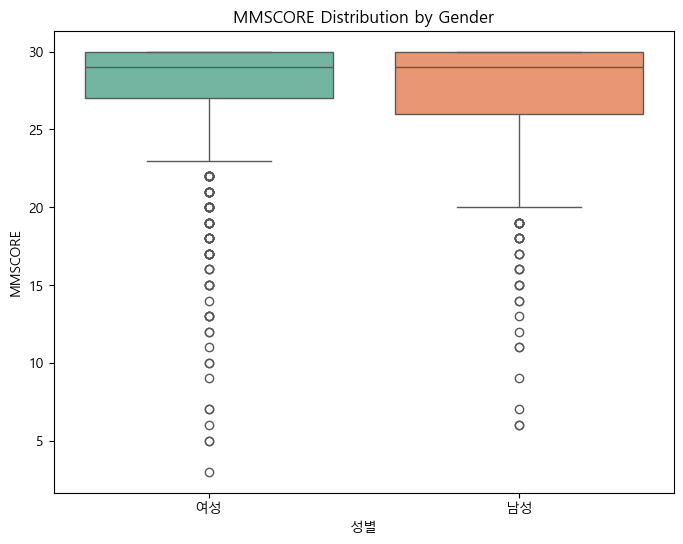

     count       mean       std  min   25%   50%   75%   max
성별                                                          
남성  1243.0  27.469027  3.178475  6.0  26.0  29.0  30.0  30.0
여성  1357.0  27.856301  3.413380  3.0  27.0  29.0  30.0  30.0


<Figure size 1200x600 with 0 Axes>

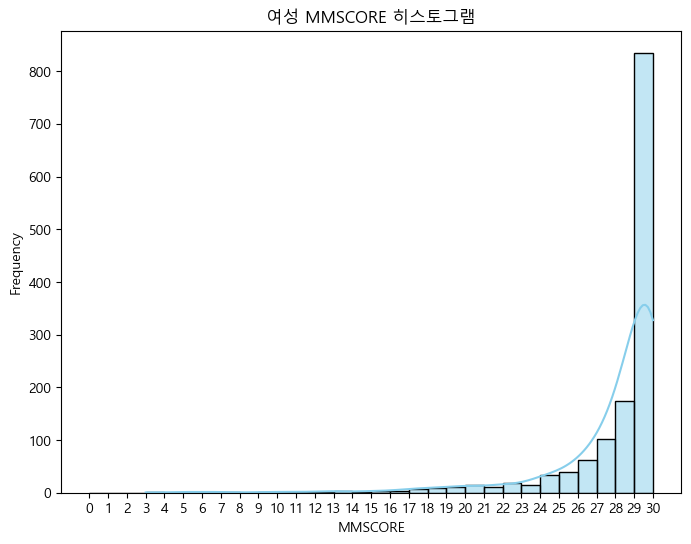

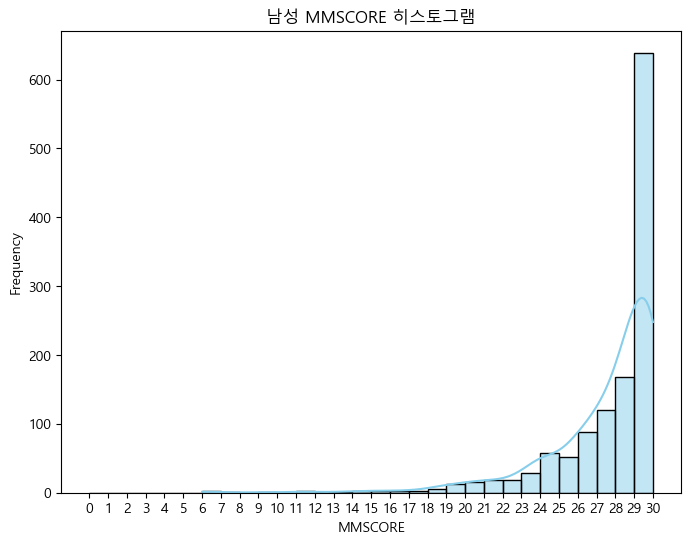

성별별 CN / MCI 이상 분포:
Group    CN  MCI 이상
성별                 
남성     1154      89
여성     1262      95


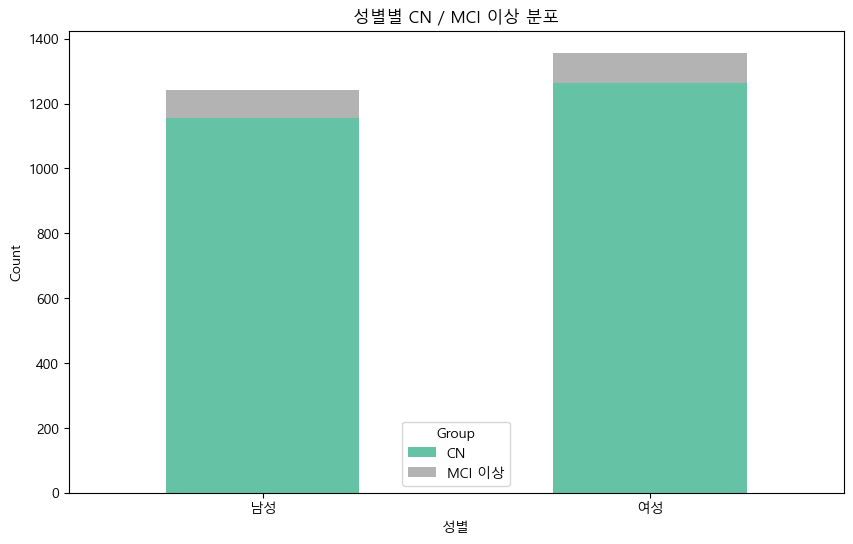

In [50]:
# 성별 매핑
data["성별"] = data["성별"].map({1: "남성", 2: "여성"})
# 성별에 따른 MMSCORE 분석
gender_mmscore = data.groupby("성별")["MMSCORE"].describe()

# 시각화
plt.figure(figsize=(8, 6))
sns.boxplot(x="성별", y="MMSCORE", data=data, palette="Set2")
plt.title("MMSCORE Distribution by Gender")
plt.show()

print(gender_mmscore)
# 성별별 MMSCORE 히스토그램
plt.figure(figsize=(12, 6))

for gender in data["성별"].unique():
    plt.figure(figsize=(8, 6))
    sns.histplot(data[data["성별"] == gender]["MMSCORE"], bins=range(0, 31, 1), kde=True, color="skyblue")
    plt.title(f"{gender} MMSCORE 히스토그램")
    plt.xlabel("MMSCORE")
    plt.ylabel("Frequency")
    plt.xticks(range(0, 31, 1))  # 1단위 눈금 설정
    plt.show()
# MMSCORE 기준으로 그룹 설정 (CN 또는 MCI 이상)
data["Group"] = data["MMSCORE"].apply(lambda x: "CN" if x >= 23 else "MCI 이상")

# 성별별 CN / MCI 이상 카운트 계산
gender_group_counts = data.groupby(["성별", "Group"]).size().unstack()

# 출력
print("성별별 CN / MCI 이상 분포:")
print(gender_group_counts)

# 시각화
gender_group_counts.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="Set2")
plt.title("성별별 CN / MCI 이상 분포")
plt.xlabel("성별")
plt.ylabel("Count")
plt.legend(title="Group")
plt.xticks(rotation=0)
plt.show()


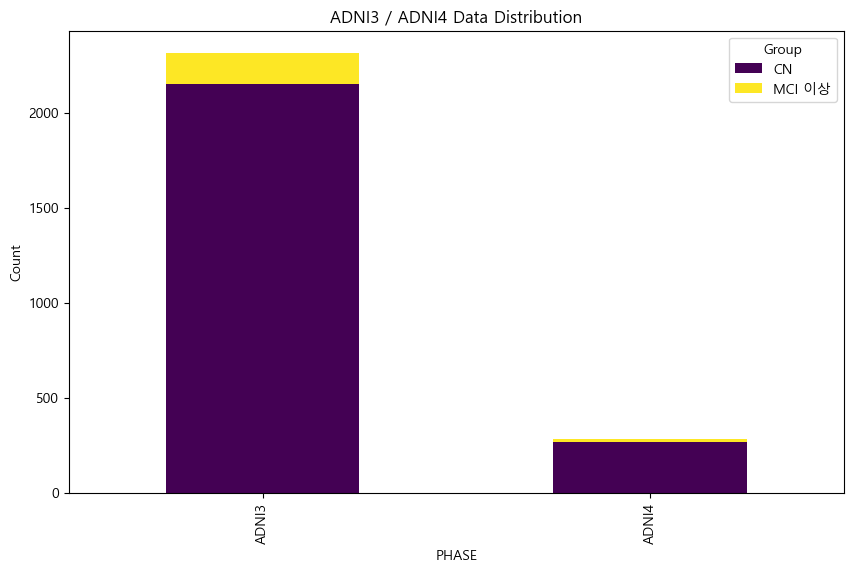

Group    CN  MCI 이상
PHASE              
ADNI3  2152     164
ADNI4   264      20


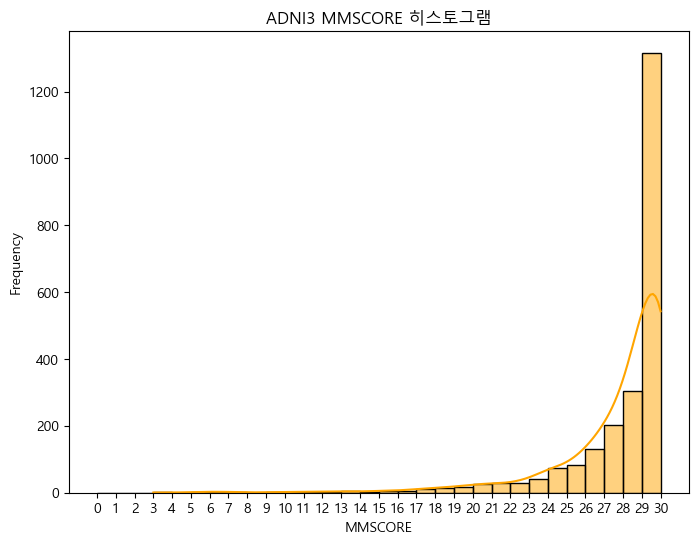

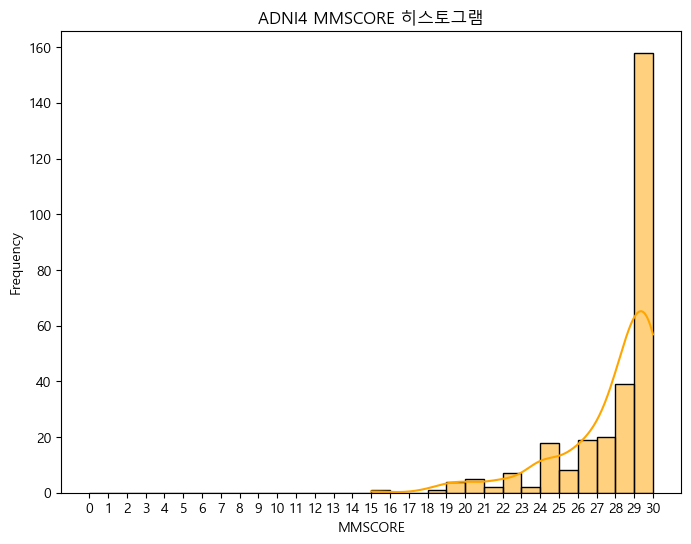

In [51]:
# MMSCORE 기준으로 CN과 MCI 이상 분류
data["Group"] = data["MMSCORE"].apply(lambda x: "CN" if x >= 23 else "MCI 이상")

# PHASE별 Group 분포
phase_group_counts = data.groupby(["PHASE", "Group"]).size().unstack()

# 시각화
phase_group_counts.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("ADNI3 / ADNI4 Data Distribution")
plt.xlabel("PHASE")
plt.ylabel("Count")
plt.legend(title="Group")
plt.show()

print(phase_group_counts)

# PHASE별 MMSCORE 히스토그램
for phase in data["PHASE"].unique():
    plt.figure(figsize=(8, 6))
    sns.histplot(data[data["PHASE"] == phase]["MMSCORE"], bins=range(0, 31, 1), kde=True, color="orange")
    plt.title(f"{phase} MMSCORE 히스토그램")
    plt.xlabel("MMSCORE")
    plt.ylabel("Frequency")
    plt.xticks(range(0, 31, 1))  # 1단위 눈금 설정
    plt.show()



Invalid birthdate format: 06-1933
Invalid birthdate format: 06-1933
Invalid birthdate format: 06-1933
Invalid birthdate format: 06-1933


C:\Users\user\AppData\Local\Temp\ipykernel_24472\1812758280.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_mmscore = data.groupby("나이 그룹")["MMSCORE"].mean()
C:\Users\user\AppData\Local\Temp\ipykernel_24472\1812758280.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_mmscore.index, y=age_group_mmscore.values, palette="viridis")


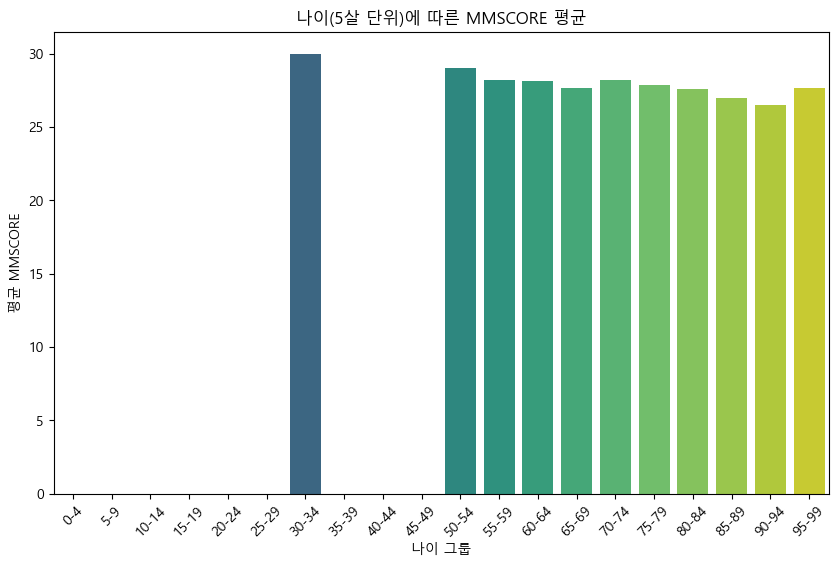

C:\Users\user\AppData\Local\Temp\ipykernel_24472\1812758280.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="나이 그룹")


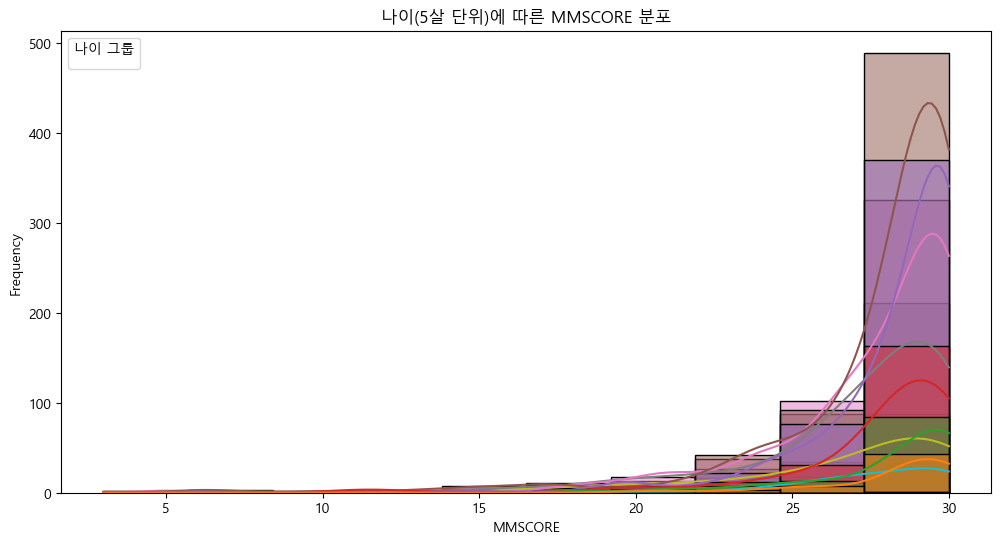

In [52]:
# 나이 계산 함수
def calculate_age(birthdate, reference_date=datetime(2024, 1, 1)):
    try:
        birth_month, birth_year = map(int, birthdate.split("/"))
        return reference_date.year - birth_year - ((reference_date.month, reference_date.day) < (birth_month, 1))
    except (IndexError, ValueError):
        print(f"Invalid birthdate format: {birthdate}")
        return None  # 잘못된 형식일 경우 None 반환

# 나이 계산 및 추가
data["나이"] = data["생년월일"].apply(calculate_age)

# 5살 단위로 나이 그룹화
data["나이 그룹"] = pd.cut(
    data["나이"], bins=range(0, 101, 5), right=False, labels=[f"{i}-{i+4}" for i in range(0, 100, 5)]
)

# 나이 그룹별 MMSCORE 평균 계산
age_group_mmscore = data.groupby("나이 그룹")["MMSCORE"].mean()

# 나이 그룹별 MMSCORE 히스토그램
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_mmscore.index, y=age_group_mmscore.values, palette="viridis")
plt.title("나이(5살 단위)에 따른 MMSCORE 평균")
plt.xlabel("나이 그룹")
plt.ylabel("평균 MMSCORE")
plt.xticks(rotation=45)
plt.show()

# MMSCORE 히스토그램 (나이 그룹별)
plt.figure(figsize=(12, 6))
sns.histplot(data, x="MMSCORE", hue="나이 그룹", bins=10, kde=True, palette="tab10")
plt.title("나이(5살 단위)에 따른 MMSCORE 분포")
plt.xlabel("MMSCORE")
plt.ylabel("Frequency")
plt.legend(title="나이 그룹")
plt.show()

Invalid birthdate format: 06-1933
Invalid birthdate format: 06-1933
Invalid birthdate format: 06-1933
Invalid birthdate format: 06-1933


C:\Users\user\AppData\Local\Temp\ipykernel_24472\2071109330.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = data.groupby(["나이 그룹", "Group"]).size().unstack().fillna(0)


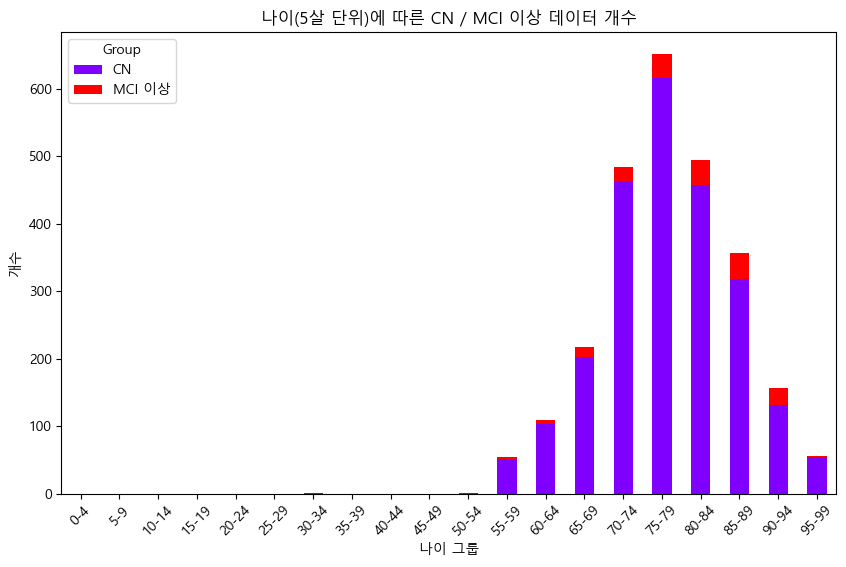

In [53]:
# 나이 계산 함수
def calculate_age(birthdate, reference_date=datetime(2024, 1, 1)):
    try:
        birth_month, birth_year = map(int, birthdate.split("/"))
        return reference_date.year - birth_year - ((reference_date.month, reference_date.day) < (birth_month, 1))
    except (IndexError, ValueError):
        print(f"Invalid birthdate format: {birthdate}")
        return None

# 나이 계산 및 추가
data["나이"] = data["생년월일"].apply(calculate_age)

# 5살 단위로 나이 그룹화
data["나이 그룹"] = pd.cut(
    data["나이"], bins=range(0, 101, 5), right=False, labels=[f"{i}-{i+4}" for i in range(0, 100, 5)]
)

# MMSCORE 기준으로 CN과 MCI 이상 분류
data["Group"] = data["MMSCORE"].apply(lambda x: "CN" if x >= 23 else "MCI 이상")

# 나이 그룹별 CN / MCI 이상 분포 계산
age_group_counts = data.groupby(["나이 그룹", "Group"]).size().unstack().fillna(0)

# 데이터 개수 시각화
age_group_counts.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="rainbow")
plt.title("나이(5살 단위)에 따른 CN / MCI 이상 데이터 개수")
plt.xlabel("나이 그룹")
plt.ylabel("개수")
plt.legend(title="Group", loc="upper left")
plt.xticks(rotation=45)
plt.show()



C:\Users\user\AppData\Local\Temp\ipykernel_24472\3550726824.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = data.groupby(["나이 그룹", "Group"]).size().unstack().fillna(0)
C:\Users\user\AppData\Local\Temp\ipykernel_24472\3550726824.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts["MCI 이상 비율"], palette="coolwarm")


Group  MCI 이상 비율
나이 그룹           
0-4          NaN
5-9          NaN
10-14        NaN
15-19        NaN
20-24        NaN
25-29        NaN
30-34   0.000000
35-39        NaN
40-44        NaN
45-49        NaN
50-54   0.000000
55-59   0.054545
60-64   0.055046
65-69   0.068807
70-74   0.041322
75-79   0.055215
80-84   0.074747
85-89   0.109244
90-94   0.159236
95-99   0.035714


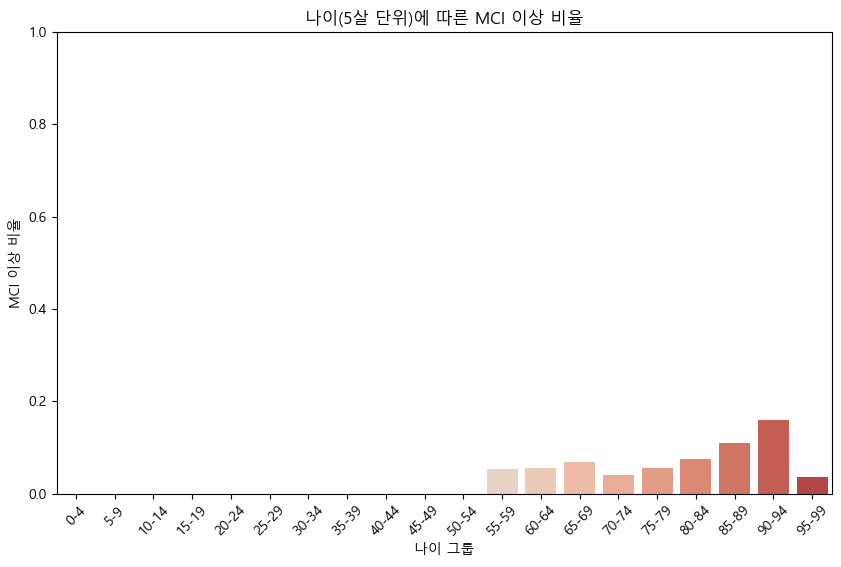

In [54]:
# 나이 그룹별 CN / MCI 이상 분포 계산
age_group_counts = data.groupby(["나이 그룹", "Group"]).size().unstack().fillna(0)

# MCI 이상 비율 계산
age_group_counts["전체"] = age_group_counts.sum(axis=1)  # 각 나이 그룹의 전체 데이터 수
age_group_counts["MCI 이상 비율"] = age_group_counts["MCI 이상"] / age_group_counts["전체"]  # 비율 계산

# MCI 이상 비율 출력
print(age_group_counts[["MCI 이상 비율"]])

# MCI 이상 비율 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts["MCI 이상 비율"], palette="coolwarm")
plt.title("나이(5살 단위)에 따른 MCI 이상 비율")
plt.xlabel("나이 그룹")
plt.ylabel("MCI 이상 비율")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # 비율 범위: 0 ~ 1
plt.show()
